# Question 7.1
#### Describe a situation or problem from your job, everyday life, current events, etc., for which exponential smoothing would be appropriate. What data would you need? Would you expect the value of alpha (the first smoothing parameter) to be closer to 0 or 1, and why?


A situation from my job for which exponential smoothing would be appropriate is in forecasting enrollment in courses for my companies programs. We are an EdTech company similar to EDX or coursera, however we are semester based so there is a clear seasonal fluctuation.

The data that I would use for this problem is the number of students that enrolled in our programs, and the date that they enrolled. My company is about 7 years old so I would use all data going back until the company started in 2012.

I would expect the value of alpha (the smoothing parameter) to be closer to be between 0.6 and 1. More recent data will be more heavily weighted because our company has changed significantly in a few ways. The first being that we have more semesters now, we used to have just 2 and now we have 4. We have more programs to offer in each semester so the enrollment will be different based on the different offerings in 2012 vs. 2018 as well. 

# Question 7.2
#### Using the 20 years of daily high temperature data for Atlanta (July through October) from Question 6.2 (file temps.txt), build and use an exponential smoothing model to help make a judgment of whether the unofficial end of summer has gotten later over the 20 years.

To identify if the unofficial end of summer has gotten later over the 20 years of temperature data in the given data set, I implemented an exponential smoothing model on the set. Specifically I used a HoltWinters model which can take seasonality into account. One of the outputs of this model is the seasonality effect so I can visualize this later in the problem to analyze the change over time.

The first step below is simple problem set up and a quick look at the data.

In [3]:
# Set directory
setwd("/Users/wwaite/Dev/gtech/ISYE 6501/Week 4")

# Load libraries
suppressWarnings(library(dplyr))
library(tidyr)

# Read data
temps <- tbl_df(read.table("temps.txt", stringsAsFactors = FALSE, header = TRUE))

# view the data
head(temps)

# Print the temps dimensions for use in the frequency argument of HoltWinters
dim(temps)

DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,⋯,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
1-Jul,98,86,91,84,89,84,90,73,82,⋯,93,95,85,95,87,92,105,82,90,85
2-Jul,97,90,88,82,91,87,90,81,81,⋯,93,85,87,90,84,94,93,85,93,87
3-Jul,97,93,91,87,93,87,87,87,86,⋯,93,82,91,89,83,95,99,76,87,79
4-Jul,90,91,91,88,95,84,89,86,88,⋯,91,86,90,91,85,92,98,77,84,85
5-Jul,89,84,91,90,96,86,93,80,90,⋯,90,88,88,80,88,90,100,83,86,84
6-Jul,93,84,89,91,96,87,93,84,90,⋯,81,87,82,87,89,90,98,83,87,84


[1] 123  21

The data set is the same as last week, comprised of 123 temepratures for each year from July through then end of October. In the next step of this analysis I first converted the temperature data into a vector and finally a time series object which is necessary for use in a HoltWinters model.

In [4]:
# Convert to time series object for input into HoltWinters model
temps_vec <- as.vector(unlist(temps[,2:21])) # Unlist flattens a data frame to convert into a vector

# Convert vector to time series object
temps_ts <- ts(temps_vec, start = 1996, frequency = 123)
class(temps_ts)

[1] "ts"

After converting the data set into the correct format I then fit the HoltWinters model with that data. This function tries to find the optimal values of alpha, beta, and or gamma by minimizing the squared one-step prediction error (the squared difference between each forecast value and actual value) if they are NULL (the default input).

The Additive model is appropriate if the magnitude of the seasonal fluctuations does not vary with the level of the time series. When the variation in the seasonal pattern appears to be proportional to the level of the time series then a multiplicative model is more appropriate, which is what I used below.

In [5]:
# Run single/double/triple exponential smoothing
temps_HW <- HoltWinters(temps_ts, 
                        alpha = NULL,
                        beta = NULL,
                        gamma = NULL,
                        seasonal = "multiplicative")

# Return coefficient values of the fitted model
temps_HW$alpha
temps_HW$beta
temps_HW$gamma

alpha 
0.615003

beta 
   0

gamma 
0.5495256

Alpha specifies how to smooth the level component of the time series and a higher alpha values place a higher weight on more recent values, so an alpha value of 0.615 shows a slightly increased weight on more recent values in the data set. 

A coefficient of 0 for beta means that the initial values for trend and/or seasonality were correct and no updating was necessary to arrive at the lowest possible MSE.

Gamma specifies how to smooth for seasonality, and similar to the other coefficients, a value closer to 1 weights later values more heavily. So in this model a gamma of 0.549 is only slightly weighted towards recent values.

In this next step, I plotted the results of the fitted model to see how accurate it is in predicting temperatures using the output coefficients. Black is real data and red is predicted. From this plot you can't really say that the length of summer is changing so we'll need to back this up further. All you can really tell from this plot is that the model is fairly accurate at predicting values.

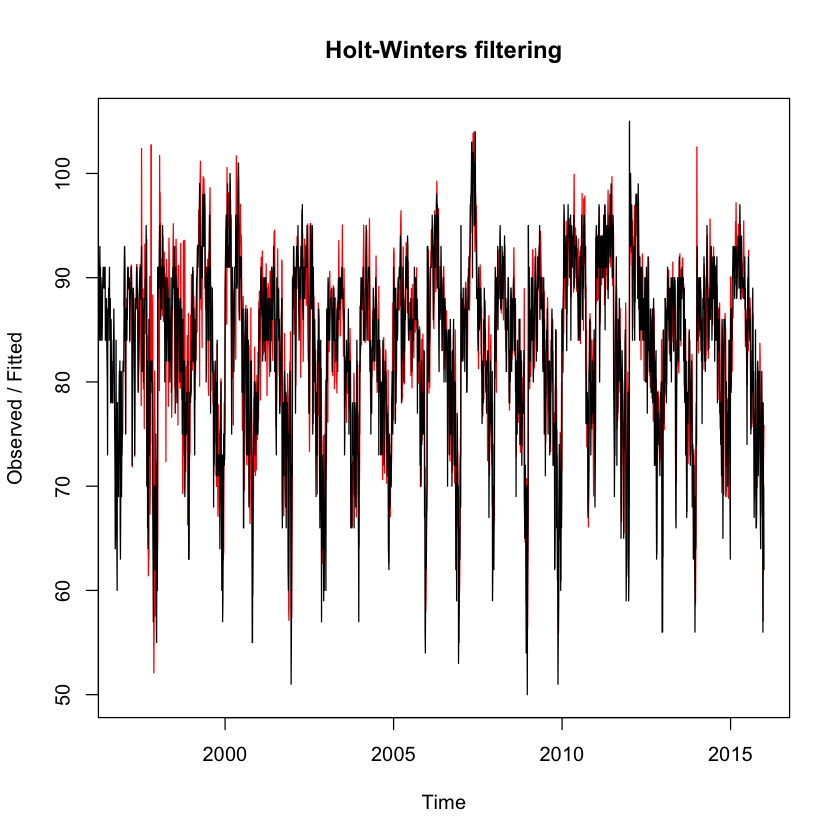

In [6]:
plot(temps_HW)

To dig into the model results further, I took a look at the fitted results from the model. Xhat is the original experimental data, level is the smooth version of the data, trend is an average of all individual trend components and season displays the effects of seasonality.

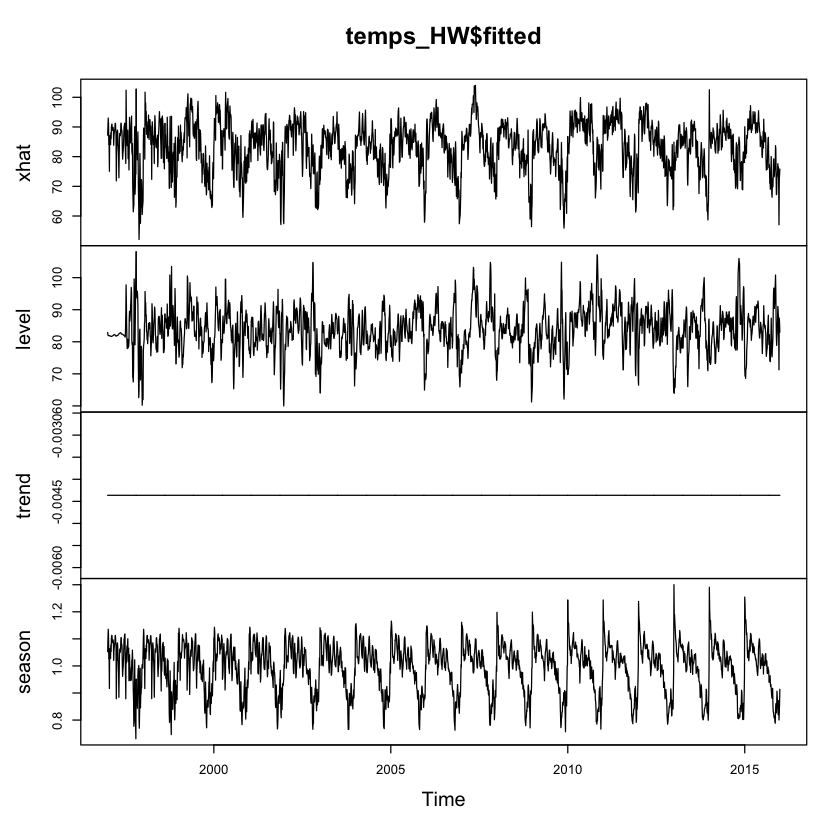

In [7]:
# take a look at the seasonal factors
plot(temps_HW$fitted)

The plot above helps us to dig into the model results further to see each component of triple exponential smoothing, however the trend aspect of the plot is a little confusing. There is another route we can take which is Classical seasonal decomposition by moving averages.

This decomposes a  time series into seasonal, trend and irregular components using moving averages. This deals with additive or multiplicative seasonal components. So this is different from above where we used triple exponential smoothing

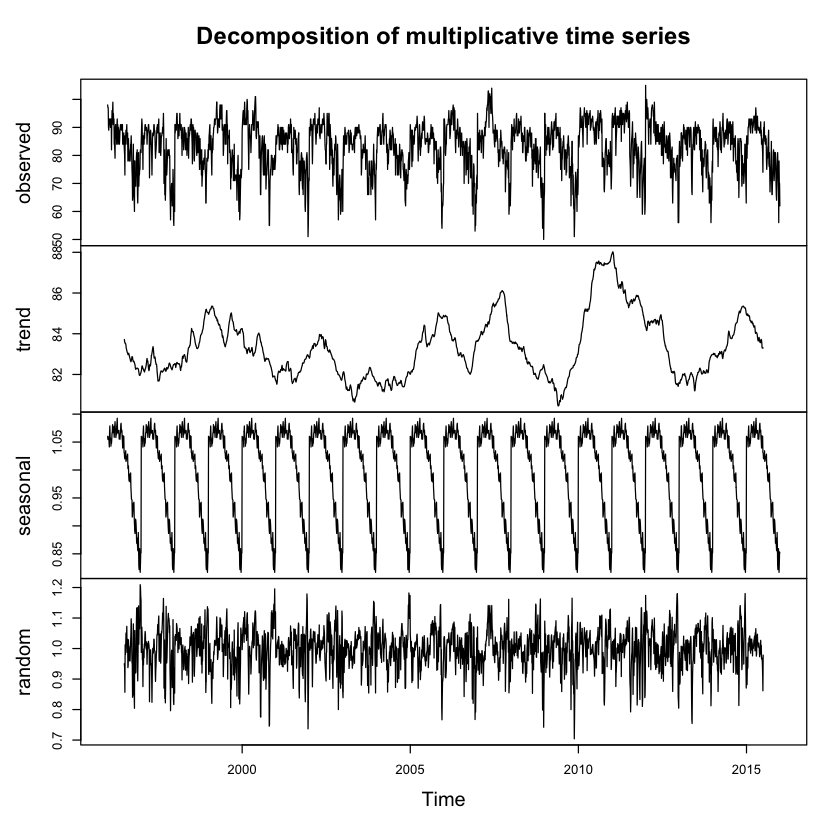

In [8]:
# Plot classical seasonal decomposition
plot(decompose(temps_ts, type = "multiplicative"))

You can see from the seasonal component of this graph that the length of summer is really not changing. The seasonal fluctuation appears to be nearly identical for all years so we can infer that based on this limited data set the length of summer is not changing over time.

Below I wanted to explore the results of the fitted model a little bit more so I used it to forecast results for the next two years.

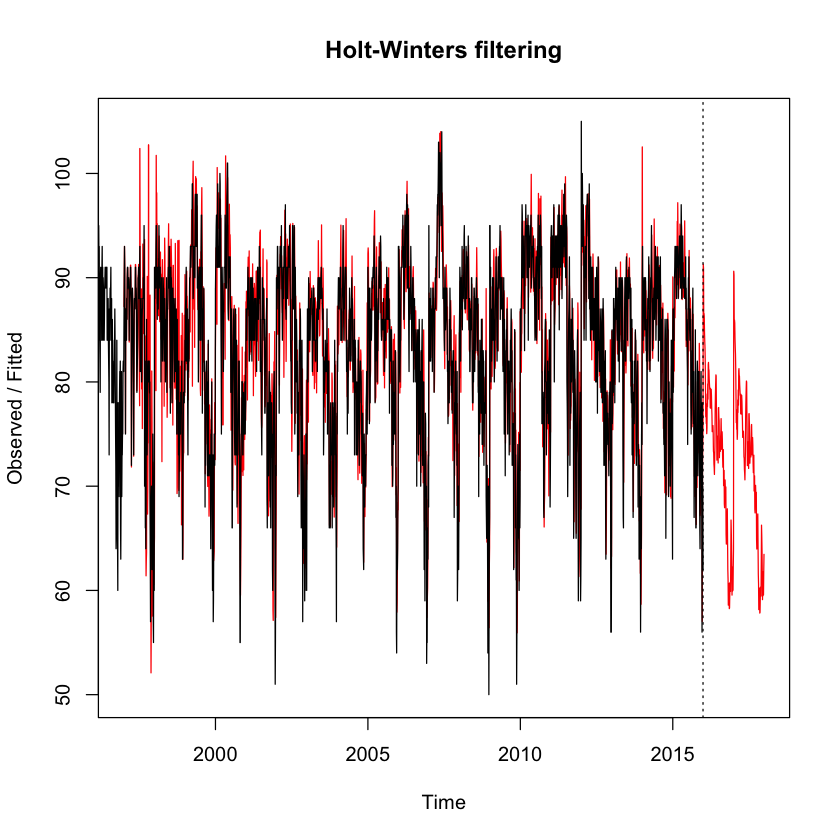

In [9]:
# Use trained model to predict future temperatures
p <- predict(temps_HW, 246, prediction.interval = FALSE)
plot(temps_HW, p)


I used the model to predict values for the next two years and it outputs results with a strong seasonal fluctuation like we saw in the original data set. There are fewer extreme values in the model output which while conservative, is safer for forecasting so as not to predict unlikely values by accident.